## The method of stock prediction with various analize method (For practice)
- This is my python project for improving my skill
- For stock prediction, the proposed method uses various algorithms such as statistical analysis, probability model and neural networks
- The simple s&p500 data is used


## 다양한 분석 기법을 활용한 주가 예측 방법 (연습) 
- 파이썬을 활용하여 다양한 분석 기법을 활용한 주가 예측 방법 구현 수행 (습작용)
- 그냥 널리 알려져 있는 통계적 분석, 확률모델, 인공 신경망 등등 여러 방법 활용
- 데이터 역시 단순한 종가 등 수학적 정보만 활용 
- 어떤 분석 방법이 예측력이 좋은지, 어떻게 하면 예측력을 높일 수 있는지 등

---
## 시도해볼것들 
### 토픽 모델링 
### 인공 신경망 
### 평가 방법 
### 비교 평가 
--- 
## Reference 
- http://3months.tistory.com/137 
    - 파이썬으로 선형 회귀 분석
- http://uncoded.tistory.com/21 
    - 파이썬으로 로지스틱 회귀 분석 구현 

    

In [3]:
''' 
Library  
'''
# default 
import numpy as np 
import pandas as pd

# For regression   
from sklearn import linear_model 
import matplotlib.pyplot as plt 



## 1) Data read and describe part 
- using pandas, read csv file 
---
- pandas 라이브러리를 활용하여 stock data(csv)를 읽어오자 
- 데이터에 대한 성격을 보자 
- 데이터 분리 622 / 82 


In [60]:
'''
date = 날짜 
open = 시가? - 시작 시 가격  
high = 고가 - 당일 최고가격 
low = 저가 - 당일 최저가격 
close = 종가 - 장 마감 가격 
volume = 거래량 
Name = sp500 회사이름 - 약어 
'''
temp_sp500_data = pd.read_csv('all_stocks_5yr.csv', header= 0, names=['date','open','high','low','close','volume','Name'])
temp_sp500_data.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [104]:
sp500_data = temp_sp500_data
sp500_data = pd.concat([sp500_data, sp500_data['close'].shift(1).rename('lag1'), 
                        sp500_data['close'].shift(2).rename('lag2'), 
                        sp500_data['close'].shift(3).rename('lag3'),
                        sp500_data['close'].shift(4).rename('lag4'), 
                        sp500_data['close'].shift(5).rename('lag5'),
                        sp500_data['close'].shift(6).rename('lag6'), 
                        sp500_data['close'].shift(7).rename('lag7'), 
                        sp500_data['close'].shift(-1).rename('fu1'),
                       sp500_data['close'].shift(-7).rename('fu7'),
                       sp500_data['close'].shift(-30).rename('fu30')], 
                        axis=1).dropna()

In [105]:
sp500_data[:2]

,date,open,high,low,close,volume,Name,lag1,lag2,lag3,lag4,lag5,lag6,lag7,fu1,fu7,fu30
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,14.26,14.50,13.99,14.66,14.27,14.46,14.75,13.37,13.61,15.69
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,13.33,14.26,14.50,13.99,14.66,14.27,14.46,13.57,13.90,15.72


In [106]:
print('A number of company in sp500 data is ', len(list(set(sp500_data['Name']))) ) 

A number of company in sp500 data is  505


In [107]:
#split data 
print(len(sp500_data))
_622_data = sp500_data[0:int(len(sp500_data)*0.6)]
_622_data_eval = sp500_data[int(len(sp500_data)*0.6)+1:int(len(sp500_data)*0.8)]
_622_data_test = sp500_data[0:int(len(sp500_data)*0.8)+1:-1]

_82_data = sp500_data[0:int(len(sp500_data)*0.8)]
_82_data_eval = sp500_data[int(len(sp500_data)*0.8)+1:-1]




618992


In [108]:
_622_data[:3]

,date,open,high,low,close,volume,Name,lag1,lag2,lag3,lag4,lag5,lag6,lag7,fu1,fu7,fu30
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL,14.26,14.50,13.99,14.66,14.27,14.46,14.75,13.37,13.61,15.69
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL,13.33,14.26,14.50,13.99,14.66,14.27,14.46,13.57,13.90,15.72
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL,13.37,13.33,14.26,14.50,13.99,14.66,14.27,13.02,14.05,15.84


## 2) 회귀모델 적용(regression model) 
- 선형 회귀 모델을 이용한 지수 예측 
- 로지스틱 회귀 모델을 이용한 up/down 예측 
- 기타 


In [109]:
#basic linear regression 
model = linear_model.LinearRegression()
x_vars1 = ['close','lag1','lag2','lag3','lag4','lag5','lag6','lag7','volume']
model.fit(_622_data[x_vars1], _622_data["fu1"]) # model.fit(x,y)
print( model.coef_, model.intercept_)



[ 1.01392153e+00 -3.58383341e-02  5.35752551e-02 -2.34160124e-02
  5.23180416e-03 -1.71192837e-02  7.83890699e-03 -5.52170224e-03
 -6.88488726e-10] 0.11334864469257866


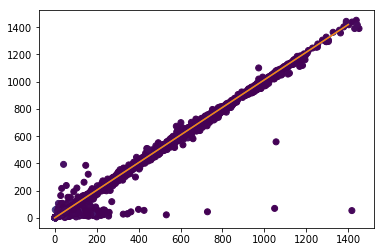

In [113]:
x = np.linspace (0 , 1400, 100)

plt.scatter(_622_data['close'], _622_data['fu1'], c=_622_data["volume"])
plt.plot(x, x*model.coef_[0]+model.coef_[1]+model.intercept_)
plt.plot(x, x*model.coef_[0]+model.intercept_)
plt.show()
